In [2]:
using Plots
using DifferentialEquations
using ParameterizedFunctions

In [4]:
ball! = @ode_def BallBounce begin
    dy =  v
    dv = -g
end g

(::BallBounce{var"###ParameterizedDiffEqFunction#292", var"###ParameterizedTGradFunction#293", var"###ParameterizedJacobianFunction#294", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [5]:
function condition(u, t, integrator)
    u[1]
end

condition (generic function with 1 method)

In [6]:
function affect!(integrator)
    integrator.u[2] = - integrator.p[2] * integrator.u[2]
end

affect! (generic function with 1 method)

In [7]:
bounce_it = ContinuousCallback(condition, affect!)

ContinuousCallback{typeof(condition), typeof(affect!), typeof(affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}(condition, affect!, affect!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, nothing, SciMLBase.LeftRootFind, 10, Bool[1, 1], 1, 2.220446049250313e-15, 0, 1//100)

In [8]:
u0 = [50.0, 0.0]
tspan = (0.0, 15.0)
p = (9.8, 0.9)

(9.8, 0.9)

In [9]:
prob = ODEProblem(ball!, u0, tspan, p, callback=bounce_it)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 15.0)
u0: 2-element Vector{Float64}:
 50.0
  0.0

In [10]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 13-element Vector{Float64}:
  0.0
  0.00010203877555101957
  0.0011224265310612151
  0.011326304086163171
  0.11336507963718272
  1.1337528351473782
  3.1943828249996717
  3.1943828249996717
  8.94427190999908
  8.94427190999908
 14.119172086498601
 14.119172086498601
 15.0
u: 13-element Vector{Vector{Float64}}:
 [50.0, 0.0]
 [49.99999994898163, -0.0009999800003999914]
 [49.99999382677754, -0.010999780004399906]
 [49.99937140269516, -0.11099778004439904]
 [49.93702695772239, -1.1109777804443903]
 [43.7015620930969, -11.110777784444302]
 [3.728058262761204e-13, -31.30495168499678]
 [3.728058262761204e-13, 28.174456516497102]
 [5.386640318481322e-13, -28.174456516496985]
 [5.386640318481322e-13, 25.357010864847286]
 [2.8021728799066148e-14, -25.357010864847773]
 [2.8021728799066148e-14, 22.821309778362995]
 [16.29994339074878, 14.189196226049287]

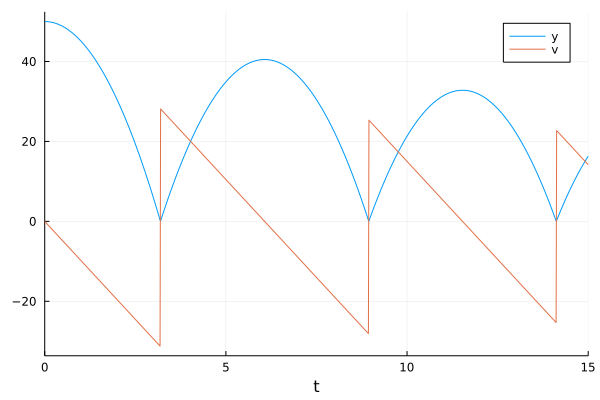

In [11]:
plot(sol)